# Assignment 6: Weather

In [1]:
# Assignment 6 — Weather

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)
# Inspect the first 3 rows
df.head(3)


/tmp/ipykernel_1910/200340077.py:8: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


In [2]:
# Convert the date column
df["date"] = pd.to_datetime(df["date"])

/tmp/ipykernel_1910/3063838563.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])


In [3]:
# Automatically extract the year and month
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day   # real day values

In [4]:
df["date"] = pd.to_datetime(df[["year", "month", "day"]])

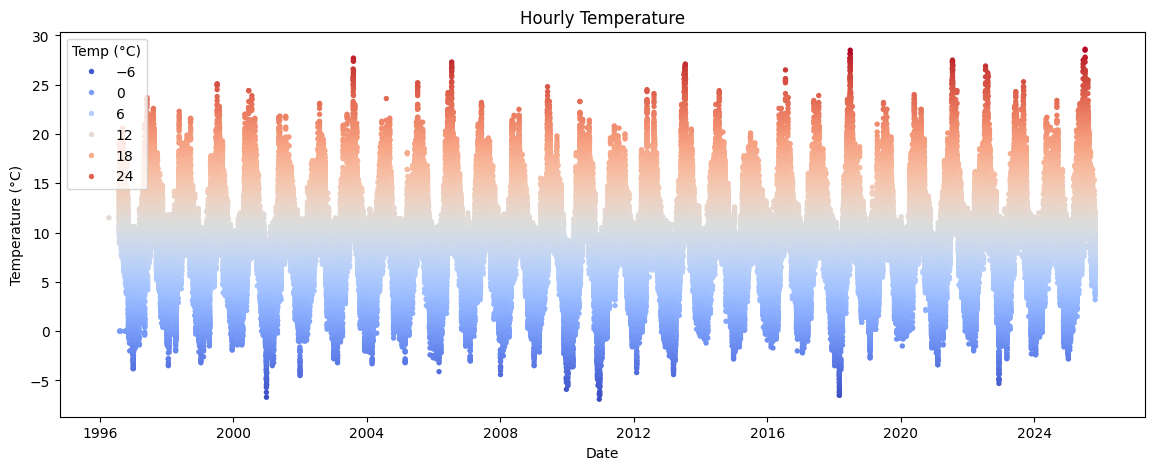

In [5]:
# Create the Temperature Plot
plt.figure(figsize=(14,5))

# Scatter with colormap based on temp
sns.scatterplot(
    data=df,
    x="date",
    y="temp",
    hue="temp",           # colour based on temperature
    palette="coolwarm",   # blue → red gradient
    s=15,                 # small point size for smooth look
    linewidth=0,
)

plt.title("Hourly Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend(title="Temp (°C)", loc="best")
plt.show()

Below is a sample of code to show how the data can be used to gather more insight from the above graph.

In this example, I show how I can see the trend of hourly temperature from 10 AM 1st June to 3 PM 9th June 2023

In [6]:
start = '2023-06-01 10:00:00'
end = '2023-06-09 15:00:00'

df_filtered = df[(df['date'] >= start) & (df['date'] <= end)]

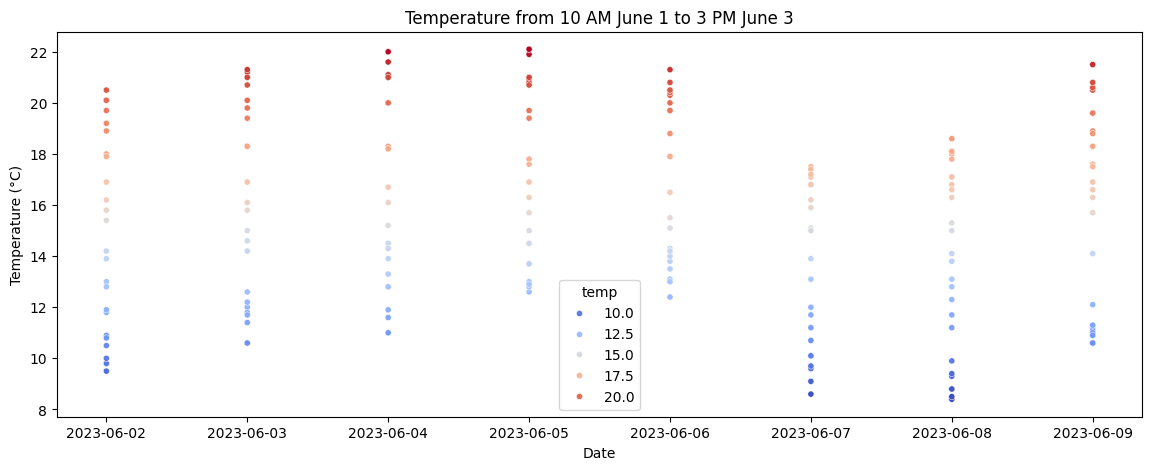

In [10]:
plt.figure(figsize=(14,5))
sns.scatterplot(
    data=df_filtered,
    x="date",
    y="temp",
    hue="temp",
    palette="coolwarm",
    s=20,       # small dots for smooth effect
    legend=True
)

plt.title("Temperature from 10 AM June 1 to 3 PM June 3")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()

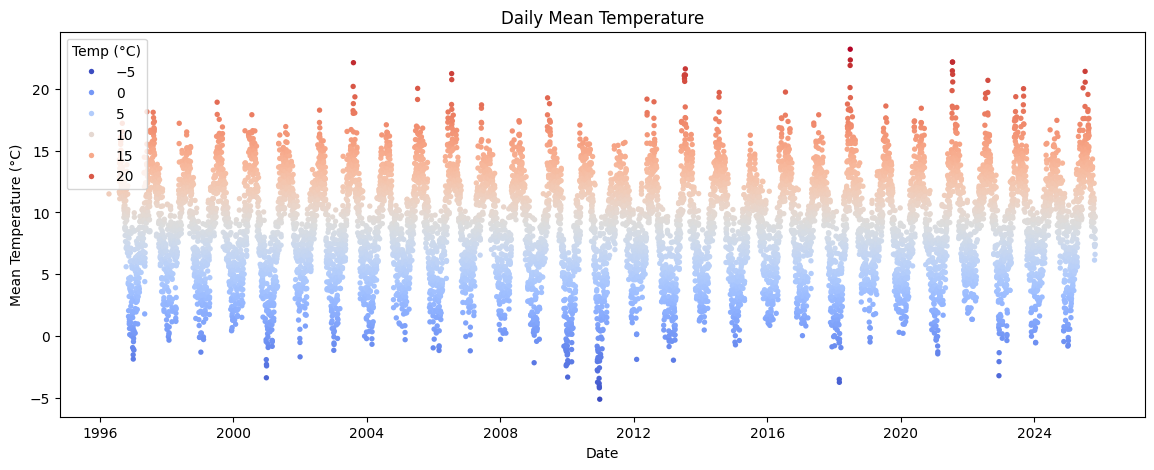

In [26]:
# Daily mean
df_daily = df.groupby(["year", "month", "day"])["temp"].mean().reset_index()
df_daily["date"] = pd.to_datetime(df_daily[["year", "month", "day"]])

# Create the Temperature Plot
plt.figure(figsize=(14,5))

# Scatter with colormap based on temp
sns.scatterplot(
    data=df_daily,
    x="date",
    y="temp",
    hue="temp",           # colour based on temperature
    palette="coolwarm",   # blue → red gradient
    s=15,                 # small point size for smooth look
    linewidth=0,
)

plt.title("Daily Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C)")
plt.legend(title="Temp (°C)", loc="best")
plt.show()

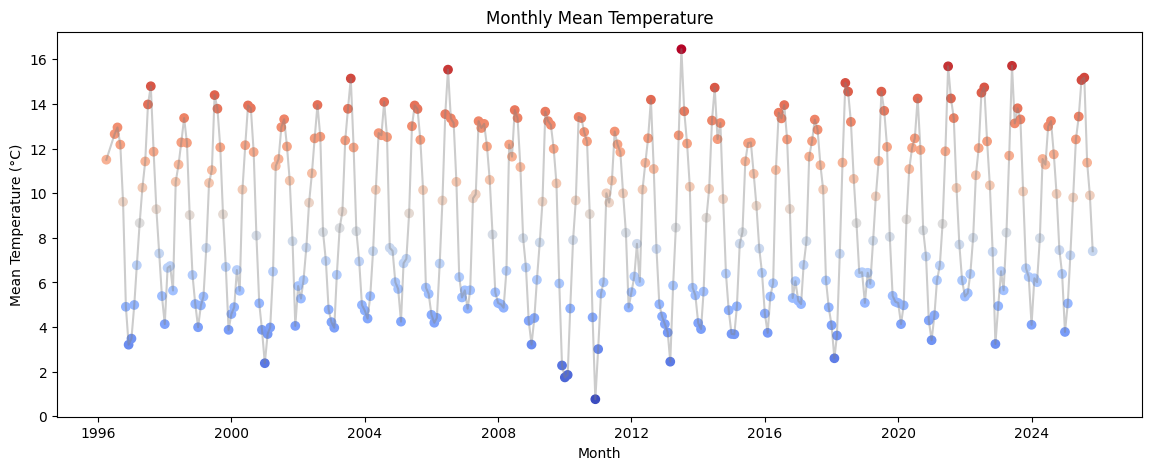

In [28]:
# Monthly mean
df_monthly = df.groupby(["year","month"])["temp"].mean().reset_index()
df_monthly["day"] = 1
df_monthly["date"] = pd.to_datetime(df_monthly[["year","month","day"]])

plt.figure(figsize=(14,5))

sns.lineplot(
    data=df_monthly,
    x="date",
    y="temp",
    color="grey",
    alpha=0.4
)

plt.scatter(
    df_monthly["date"],
    df_monthly["temp"],
    c=df_monthly["temp"],
    cmap="coolwarm"
)

plt.title("Monthly Mean Temperature")
plt.xlabel("Month")
plt.ylabel("Mean Temperature (°C)")
plt.show()